# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from microlensing.IPM.ipm import IPM
from microlensing.CCF.ccf import CCF

# Creating a magnification map

In [2]:
# calculating critical curves depends on the number of stars used
# we therefore set rectangular=True to avoid using a circular field with a larger number of stars
# we set approx=True to approximate the smooth deflection angle alpha_smooth with a Taylor series,
# as exact calculations involve transcendental functions for which we cannot guarantee all the
# critical curves have been located
 
ipm = IPM(verbose=1, 
          kappa_tot=0.4, shear=0.4, smooth_fraction=0.5, 
          rectangular=True, approx=True,
          half_length_y1=25, half_length_y2=25,
          num_pixels_y1=5000, num_pixels_y2=5000,
          write_stars=True) # we will also want to write the stars to disk

ipm.random_seed = 0 # setting to 0 will cause object to generate a random seed of its own
ipm.run()
ipm.save() # save stars to disk to use for finding caustics

Generating star field...
Done generating star field. Elapsed time: 0 seconds.

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.063 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.067 seconds.

Shooting cells...
100 %
Done shooting cells. Elapsed time: 2.028 seconds.

Done writing parameter info to file ./ipm_parameter_info.txt
Done writing star info to file ./ipm_stars.bin


# Locating critical curves and caustics

In [3]:
ccf = CCF(verbose=1, 
          kappa_tot=ipm.kappa_tot, shear=ipm.shear, 
          starfile=f'{ipm.outfile_prefix}ipm_stars.bin',
          num_phi=200) # number of steps for the phase parameter phi that traces the critical curves

In [4]:
ccf.run()

Creating children and sorting stars...
Done creating children and sorting stars. Elapsed time: 0.087 seconds.

Calculating multipole and local coefficients...
Done calculating multipole and local coefficients. Elapsed time: 0.101 seconds.

Finding initial roots...
[==================================================] 100 %
Done finding initial roots. Elapsed time: 0.392 seconds.
Maximum error in 1/mu: 2.11229e-09

Finding critical curve positions...
[==================================================] 100 %
Done finding critical curve positions. Elapsed time: 7.507 seconds.
Maximum error in 1/mu: 3.02005e-09



# Plotting

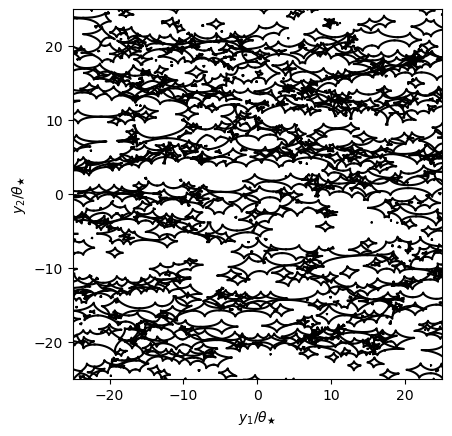

In [5]:
# plot the locations of the caustics
fig, ax = plt.subplots()
ccf.plot_caustics(ax)
ax.set_xlim(ipm.extent[0])
ax.set_ylim(ipm.extent[1])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()

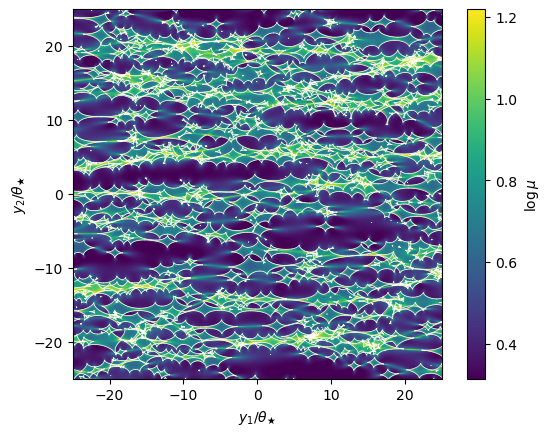

In [6]:
# overlay the locations of the caustics on top of the magnification map
fig, ax = plt.subplots()
ccf.plot_caustics(ax, color='white', linewidth=0.5)
ipm.plot(ax)
plt.show()

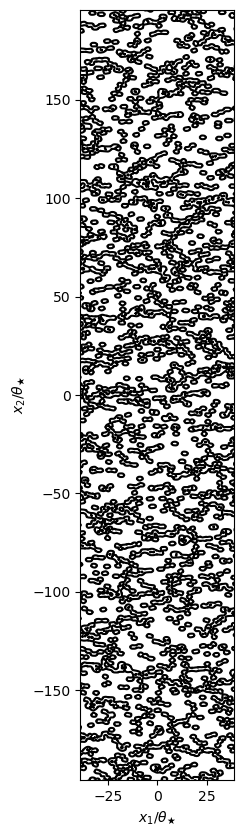

In [7]:
# plot the locations of the critical curves
fig, ax = plt.subplots(figsize=(10,10))
ccf.plot_critical_curves(ax)

# limit the plotting region to the portion of the image plane used to create the magnification map
ax.set_xlim([(ipm.center[0] - ipm.half_length[0] - ipm.stars.r999) / np.abs(1 - ipm.kappa_tot + ipm.shear), 
             (ipm.center[0] + ipm.half_length[0] + ipm.stars.r999) / np.abs(1 - ipm.kappa_tot + ipm.shear)])
ax.set_ylim([(ipm.center[1] - ipm.half_length[1] - ipm.stars.r999) / np.abs(1 - ipm.kappa_tot - ipm.shear), 
             (ipm.center[1] + ipm.half_length[1] + ipm.stars.r999) / np.abs(1 - ipm.kappa_tot - ipm.shear)])
ax.set_aspect(ipm.half_length[0] / ipm.half_length[1])
plt.show()